<a href="https://colab.research.google.com/github/SenaKymk/pupilica_ai_bootcamp_assignment/blob/main/randomForestEx.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Random Forest Examples - Classification and Regression

In this notebook, we demonstrate the usage of Random Forest for both classification and regression tasks using two datasets:
- Olivetti Faces dataset (Classification)
- California Housing dataset (Regression)


In [75]:

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_olivetti_faces
import numpy as np


##  Olivetti Faces Dataset - Classification Task

We load the Olivetti Faces dataset and train a Random Forest Classifier to perform face classification based on the images.


In [76]:
olivetti= fetch_olivetti_faces()

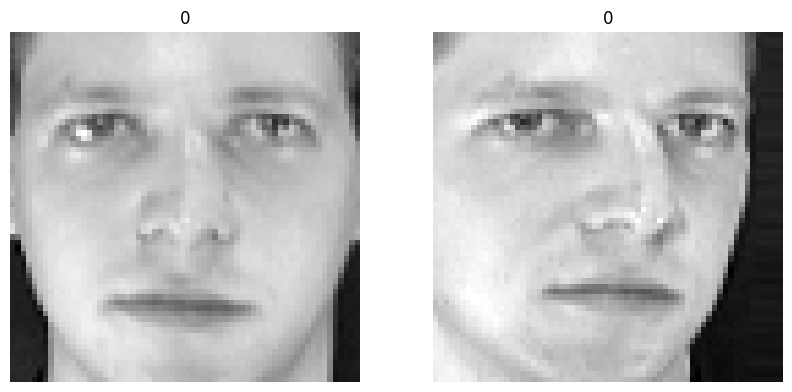

In [77]:
plt.figure(figsize=(10,10))
for i in range(2):
    plt.subplot(2,2,i+1)
    plt.imshow(olivetti.images[i],cmap='gray')
    plt.title(olivetti.target[i])
    plt.axis('off')
plt.show()

In [78]:
olivetti= fetch_olivetti_faces()
X= olivetti.data
y= olivetti.target

##  Random Forest Classifier Training

We initialize and train a Random Forest Classifier with 100 estimators.


In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [80]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [81]:
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [82]:
y_pred = rf_clf.predict(X_test)

## Classification Results

We evaluate the model performance by calculating the accuracy scores on both the training and testing datasets.


In [83]:
train_accuracy = rf_clf.score(X_train, y_train)
accuracy = accuracy_score(y_test, y_pred)
print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", accuracy)



Train Accuracy: 1.0
Test Accuracy: 0.9375


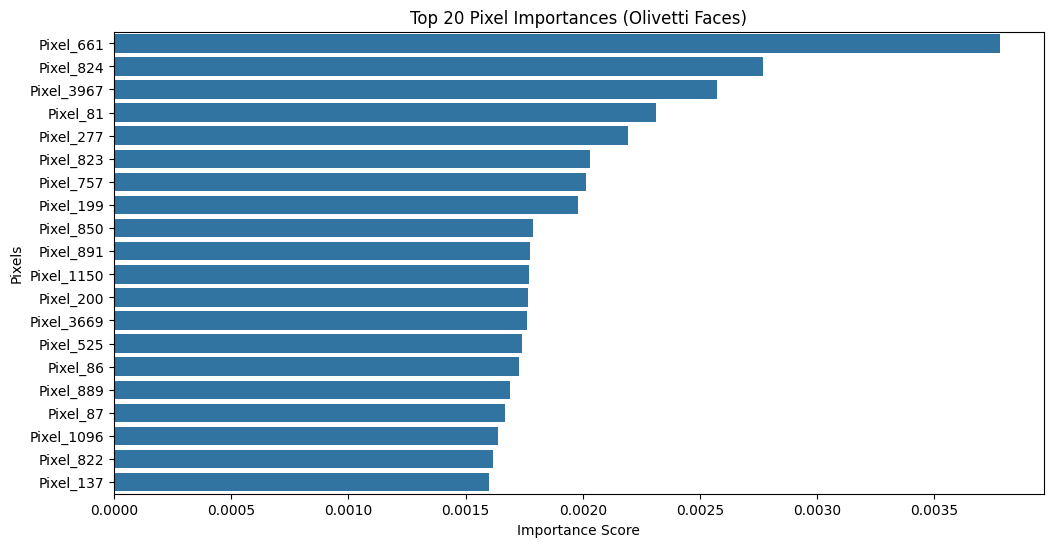

In [84]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Olivetti için Feature Importance
feature_importances = pd.Series(rf_clf.feature_importances_, index=[f'Pixel_{i}' for i in range(rf_clf.feature_importances_.shape[0])])
feature_importances = feature_importances.sort_values(ascending=False)

# Çizim
plt.figure(figsize=(12,6))
sns.barplot(x=feature_importances.values[:20], y=feature_importances.index[:20])
plt.title('Top 20 Pixel Importances (Olivetti Faces)')
plt.xlabel('Importance Score')
plt.ylabel('Pixels')
plt.show()


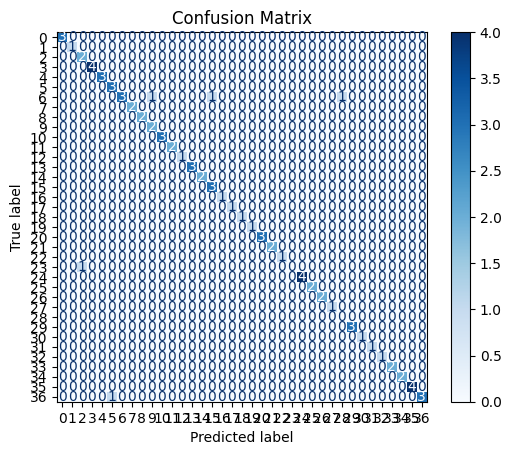

In [85]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()


# 🏠 California Housing Dataset - Regression Task

Now, we switch to the California Housing dataset to demonstrate a regression task using Random Forest.


In [86]:
from sklearn.datasets import fetch_california_housing
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [87]:
california_housing = fetch_california_housing()

In [88]:
X= california_housing.data
y= california_housing.target

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##  Random Forest Regressor Training

We initialize and train a Random Forest Regressor to predict housing prices based on the features in the dataset.


In [90]:
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train)
y_pred = rf_reg.predict(X_test)

##  Model Evaluation - Mean Squared Error (MSE)

We calculate the Mean Squared Error (MSE) and Root Mean Squared Error (RMSE) to evaluate the regression model's performance.


In [91]:
mean_squared_error(y_test, y_pred,)

0.2553684927247781

In [92]:
rmse= np.sqrt(mean_squared_error(y_test, y_pred))
rmse


np.float64(0.5053399773665033)

# 📌 Conclusion

In this notebook, we successfully applied Random Forest models to both classification and regression problems.

- For classification, the model performed well on face recognition tasks.
- For regression, we predicted housing prices with a reasonable error margin.

Random Forest proves to be a powerful and flexible algorithm for various machine learning tasks.


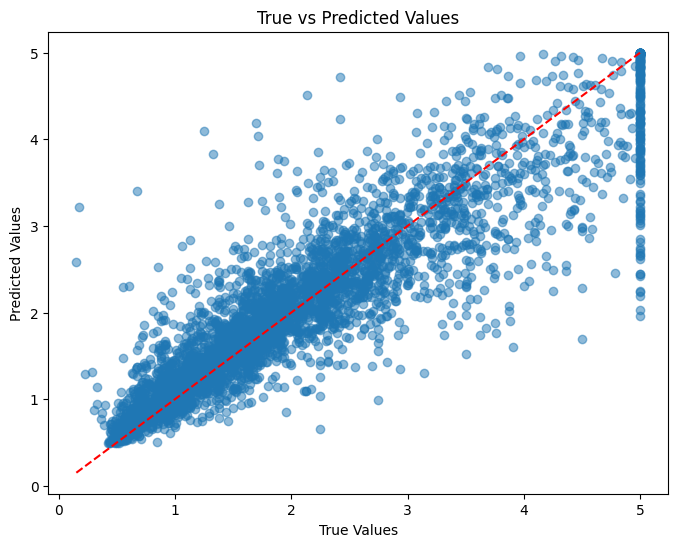

In [93]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("True vs Predicted Values")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()



##  True vs Predicted Values - Scatter Plot Interpretation

This scatter plot compares the model's predicted values to the actual target values.

**Observations:**
- Most of the points are concentrated around the red diagonal line, indicating that the model's predictions closely match the true values.
- The spread around the line is moderate, suggesting some variance but no significant bias.
- A few outliers are visible, which is expected in real-world data.

**Conclusion:** The model demonstrates good predictive performance with a strong correlation between true and predicted values.


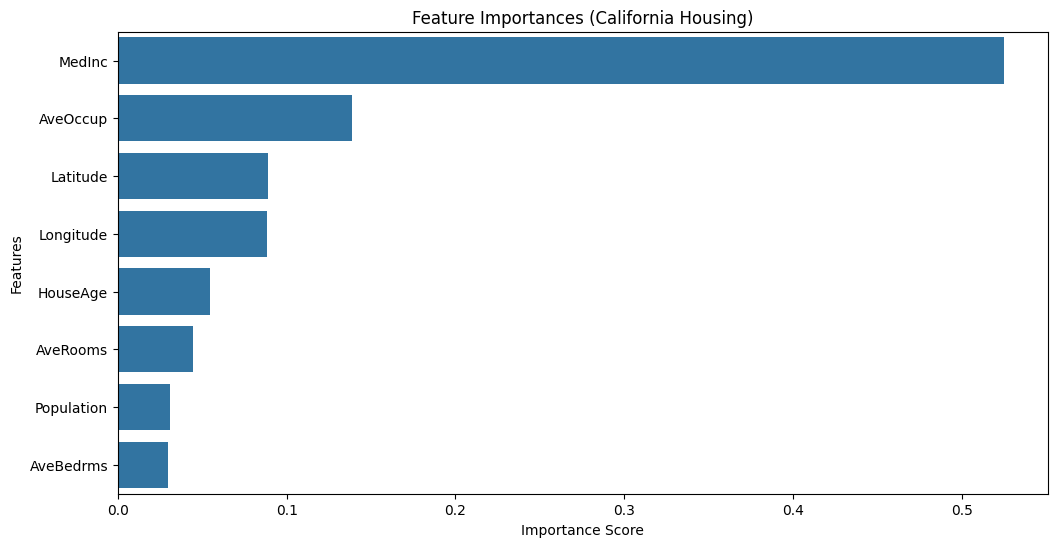

In [94]:
# California Housing için Feature Importance
feature_importances = pd.Series(rf_reg.feature_importances_, index=california_housing.feature_names)
feature_importances = feature_importances.sort_values(ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(x=feature_importances.values, y=feature_importances.index)
plt.title('Feature Importances (California Housing)')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()


#  Feature Importance Analysis - California Housing Dataset

The bar chart below illustrates the feature importance scores obtained from the Random Forest Regressor model.

**Key observations:**
- `MedInc` (Median Income) is by far the most influential feature in predicting the housing prices.
- `AveOccup`, `Latitude`, and `Longitude` also contribute to the model but with significantly less impact.
- Features like `AveBedrms` and `Population` have minimal influence on the target variable.

This visualization helps in understanding which variables are driving the model's predictions and can assist in future feature selection or engineering processes.